In [1]:
!pip install -q kaggle xgboost

In [2]:
import zipfile
import os

zip_path = "/content/smokerstatusdataset.zip"   # your uploaded file
extract_path = "/content/smoker_data"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("Extracted files:", os.listdir(extract_path))


Extracted files: ['train_dataset.csv', 'test_dataset.csv']


In [3]:
import pandas as pd
import os

# find CSV files in extracted folder
csv_files = [f for f in os.listdir(extract_path) if f.endswith(".csv")]
csv_files


['train_dataset.csv', 'test_dataset.csv']

In [4]:
df = pd.read_csv(os.path.join(extract_path, csv_files[0]))
df.head()


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [5]:
print("Shape:", df.shape)
df.info()
df.describe().T


Shape: (38984, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin       

,count,mean,std,min,25%,50%,75%,max
age,38984.0,44.127591,12.063564,20.0,40.0,40.0,55.0,85.0
height(cm),38984.0,164.689488,9.187507,130.0,160.0,165.0,170.0,190.0
weight(kg),38984.0,65.938718,12.896581,30.0,55.0,65.0,75.0,135.0
waist(cm),38984.0,82.062115,9.326798,51.0,76.0,82.0,88.0,129.0
eyesight(left),38984.0,1.014955,0.498527,0.1,0.8,1.0,1.2,9.9
eyesight(right),38984.0,1.008768,0.493813,0.1,0.8,1.0,1.2,9.9
hearing(left),38984.0,1.025369,0.157246,1.0,1.0,1.0,1.0,2.0
hearing(right),38984.0,1.026190,0.159703,1.0,1.0,1.0,1.0,2.0
systolic,38984.0,121.475631,13.643521,71.0,112.0,120.0,130.0,233.0
relaxation,38984.0,75.994408,9.658734,40.0,70.0,76.0,82.0,146.0


In [6]:
missing = pd.DataFrame({
    "missing_count": df.isnull().sum(),
    "missing_pct": df.isnull().mean() * 100
})
missing


,missing_count,missing_pct
age,0,0.0
height(cm),0,0.0
weight(kg),0,0.0
waist(cm),0,0.0
eyesight(left),0,0.0
eyesight(right),0,0.0
hearing(left),0,0.0
hearing(right),0,0.0
systolic,0,0.0
relaxation,0,0.0


In [7]:
df['smoking'].value_counts()

,count
smoking,
0,24666
1,14318


In [8]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

,count,mean,std,min,25%,50%,75%,max
age,38984.0,44.127591,12.063564,20.0,40.0,40.0,55.0,85.0
height(cm),38984.0,164.689488,9.187507,130.0,160.0,165.0,170.0,190.0
weight(kg),38984.0,65.938718,12.896581,30.0,55.0,65.0,75.0,135.0
waist(cm),38984.0,82.062115,9.326798,51.0,76.0,82.0,88.0,129.0
eyesight(left),38984.0,1.014955,0.498527,0.1,0.8,1.0,1.2,9.9
eyesight(right),38984.0,1.008768,0.493813,0.1,0.8,1.0,1.2,9.9
hearing(left),38984.0,1.025369,0.157246,1.0,1.0,1.0,1.0,2.0
hearing(right),38984.0,1.026190,0.159703,1.0,1.0,1.0,1.0,2.0
systolic,38984.0,121.475631,13.643521,71.0,112.0,120.0,130.0,233.0
relaxation,38984.0,75.994408,9.658734,40.0,70.0,76.0,82.0,146.0


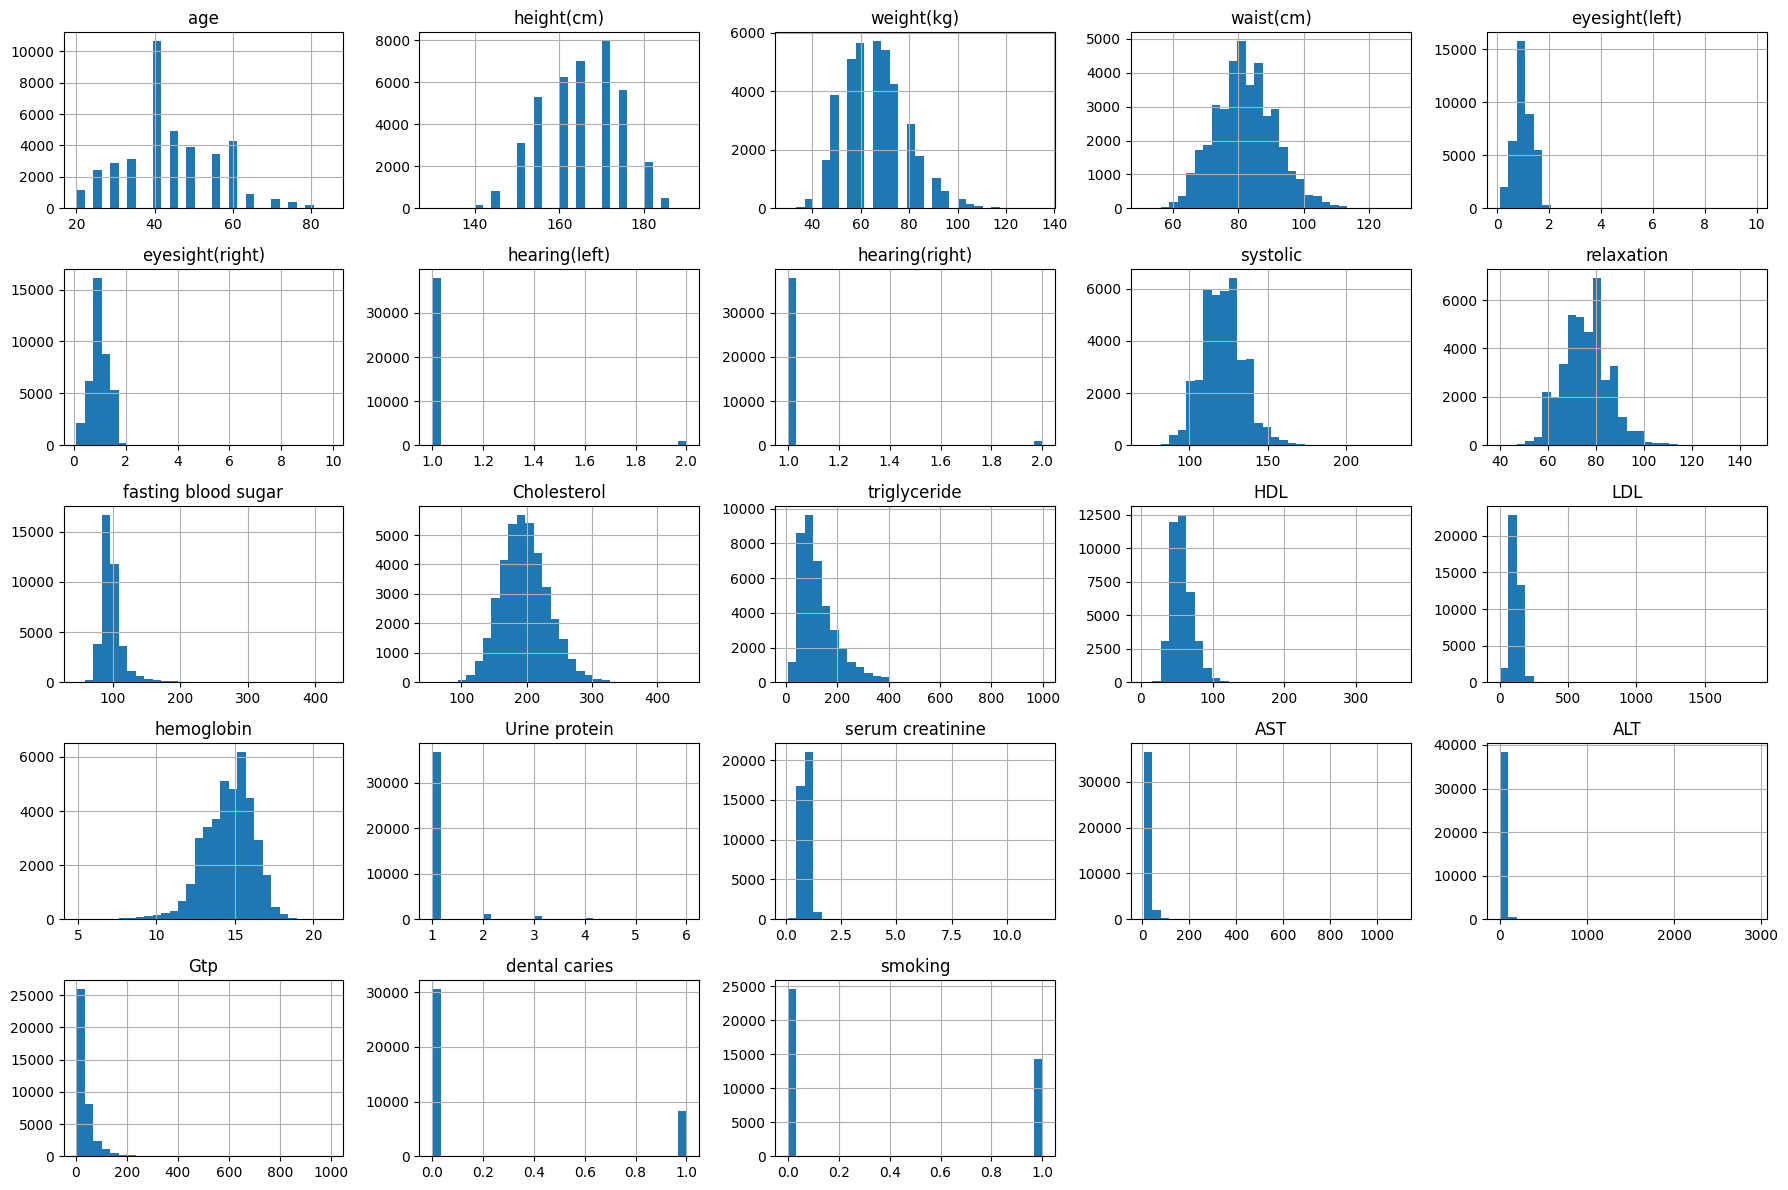

In [9]:
import matplotlib.pyplot as plt
df.hist(figsize=(18, 12), bins=30)
plt.tight_layout()
plt.show()


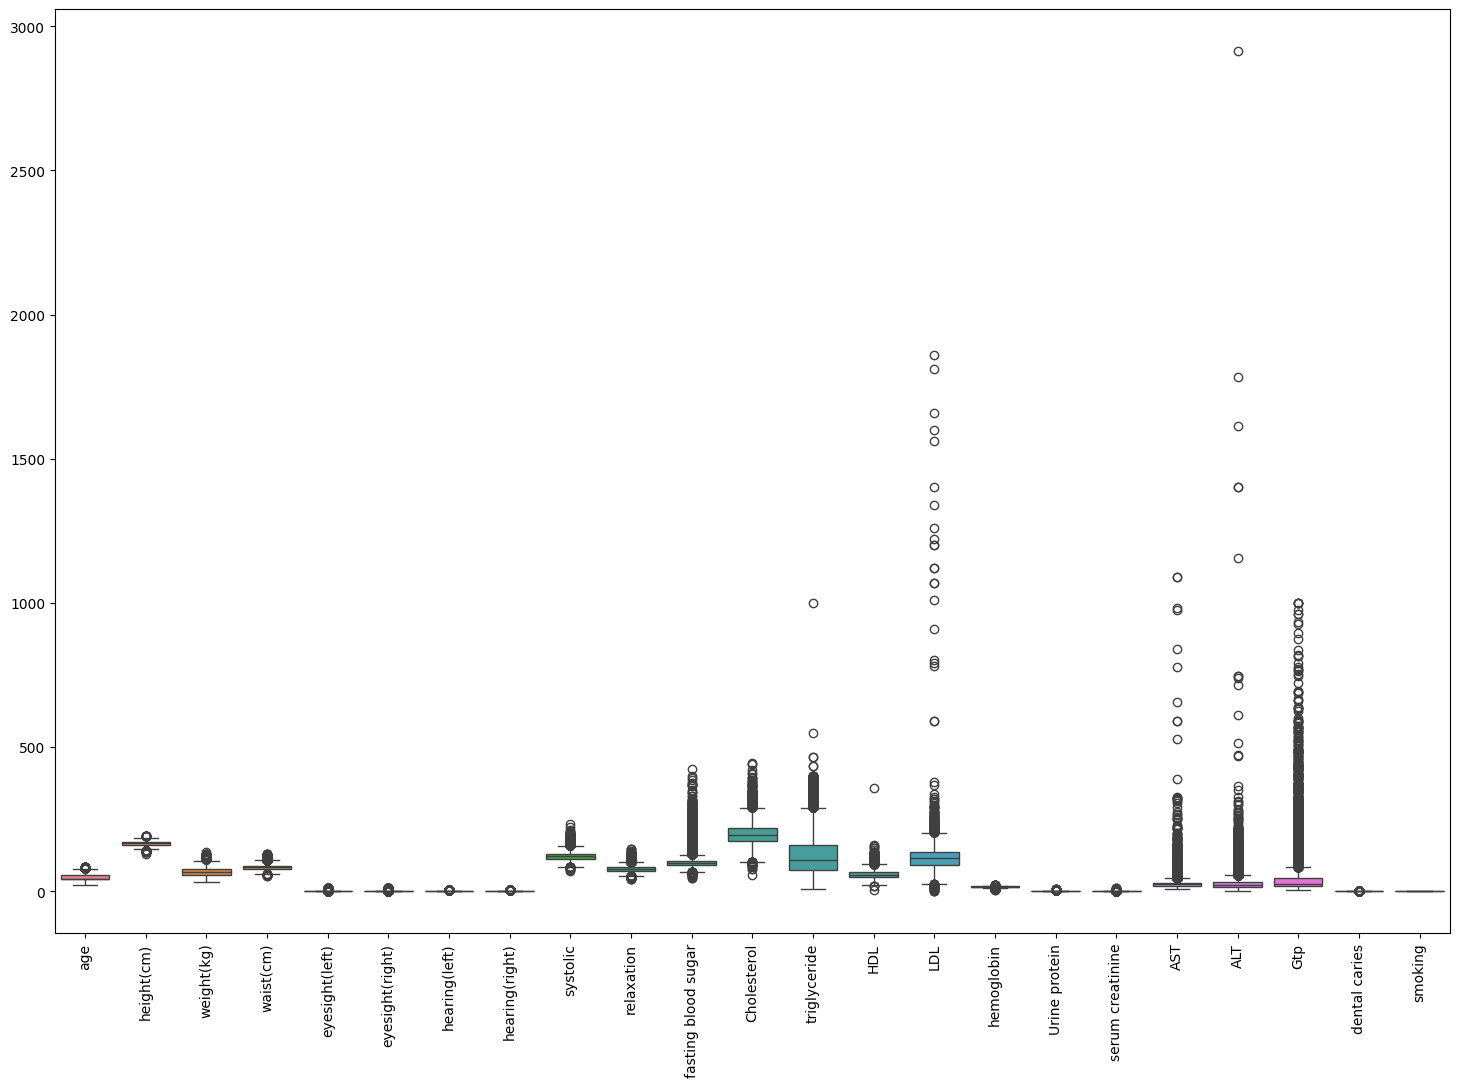

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


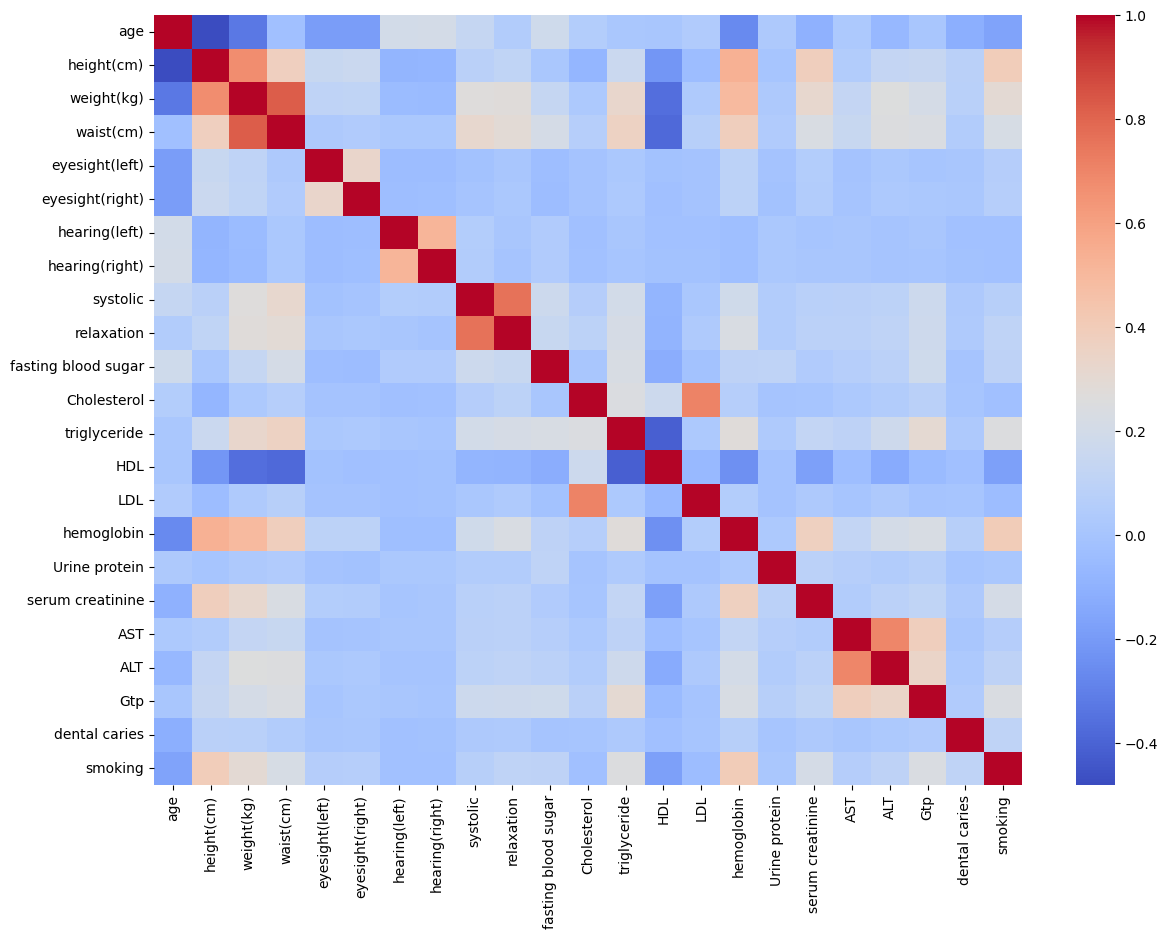

In [11]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.show()


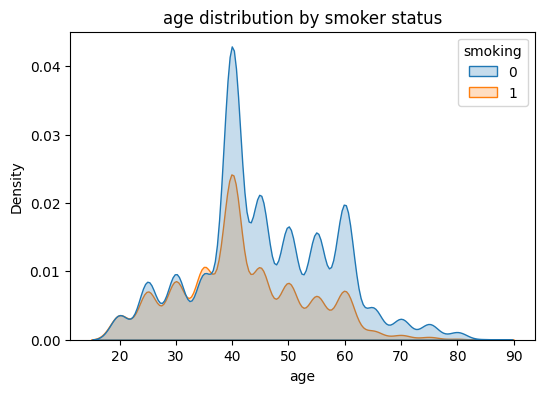

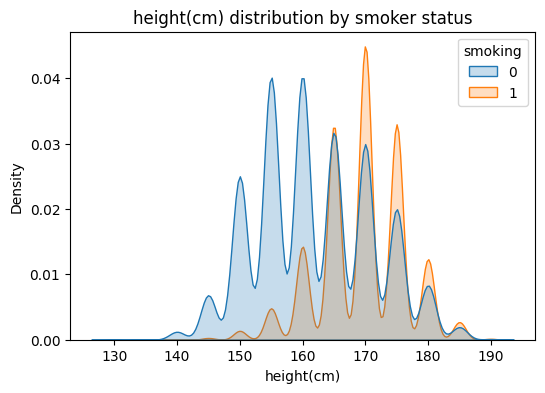

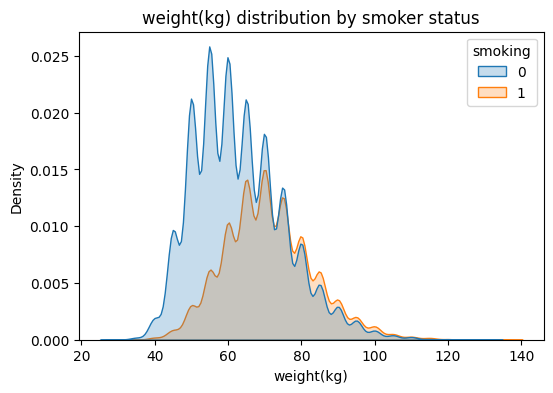

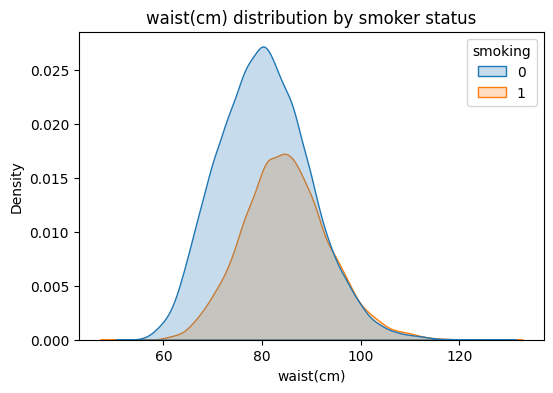

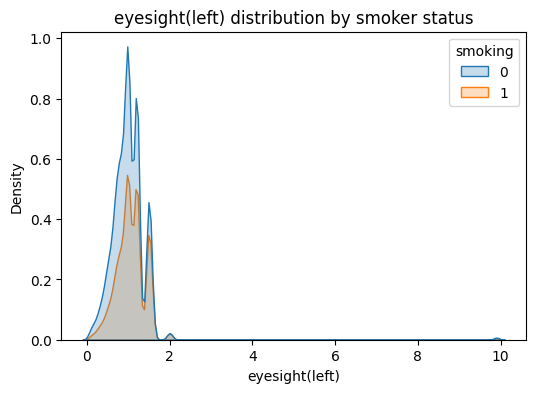

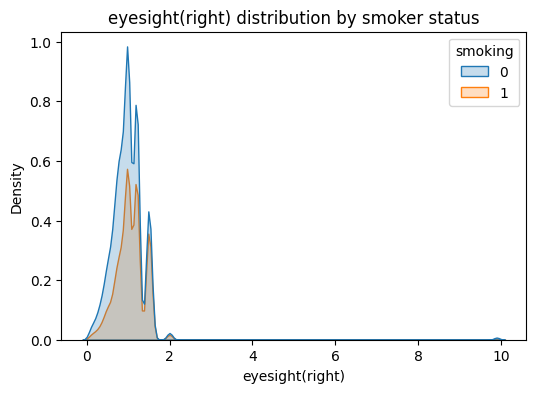

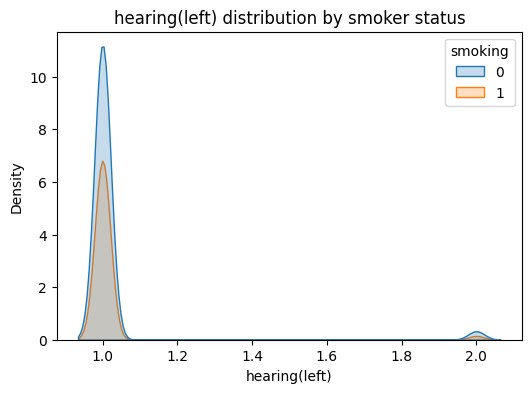

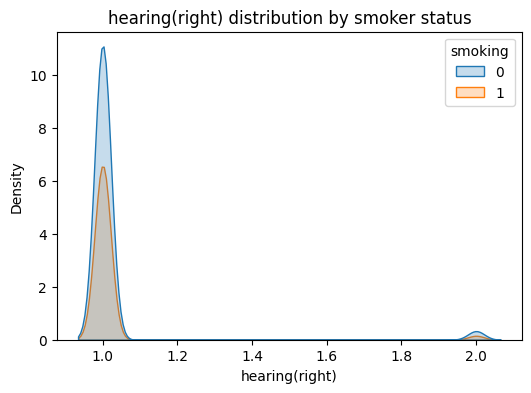

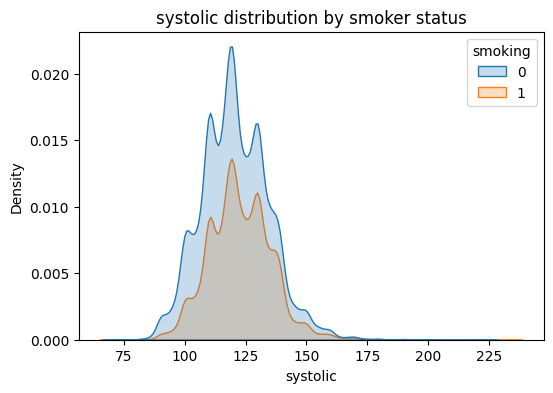

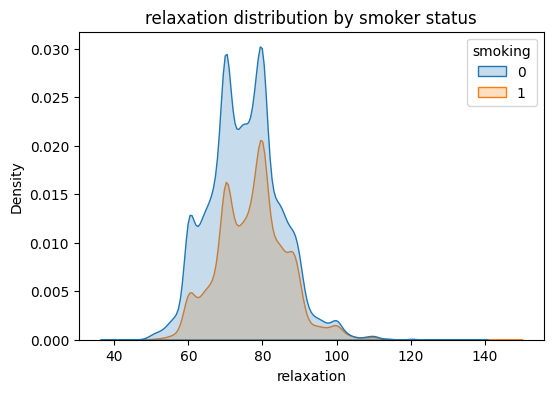

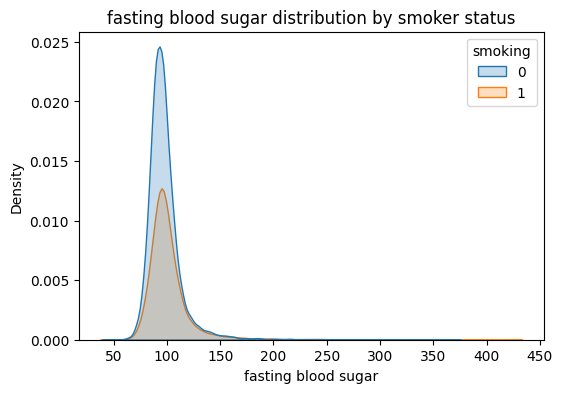

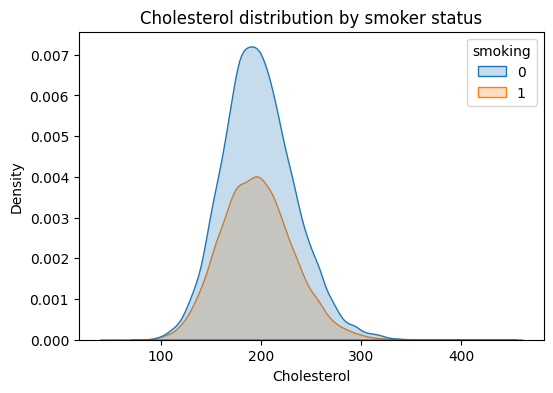

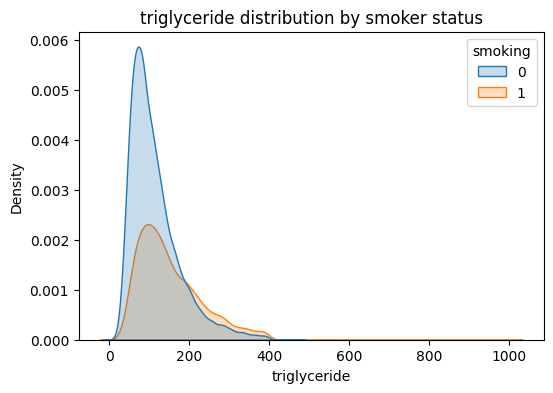

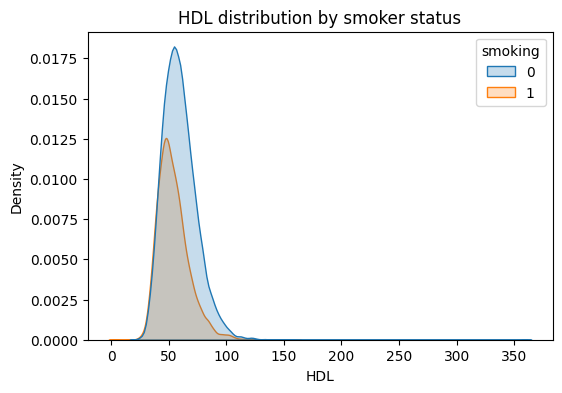

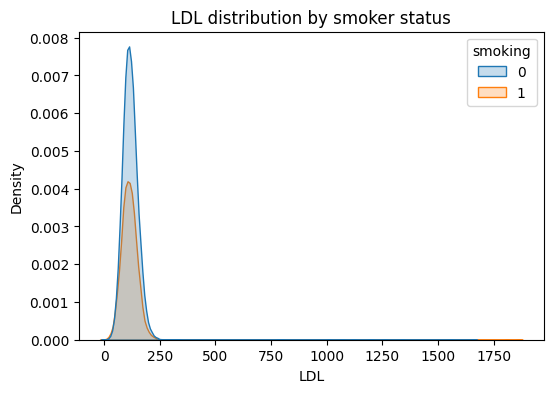

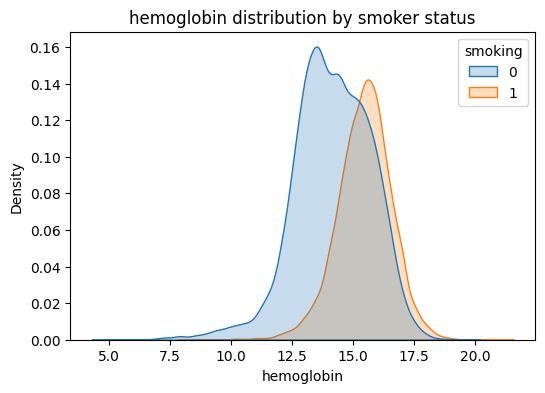

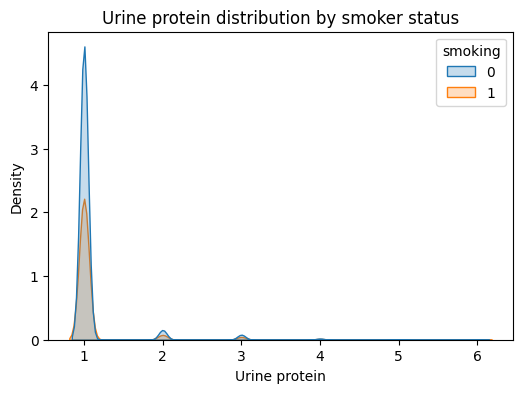

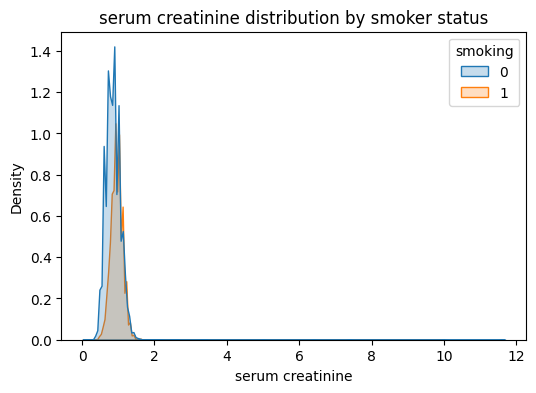

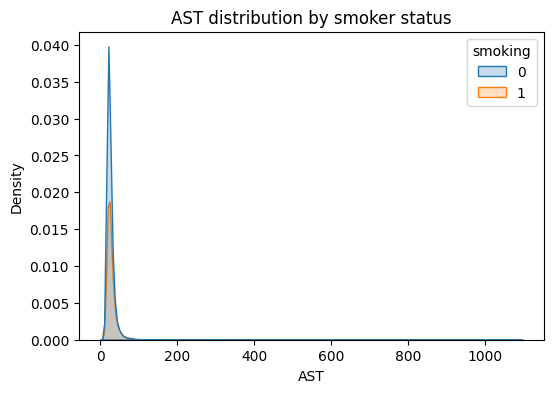

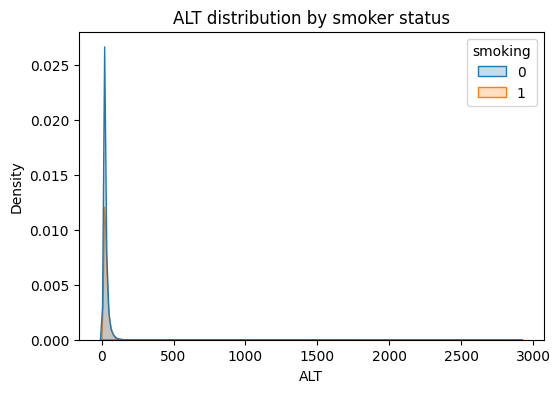

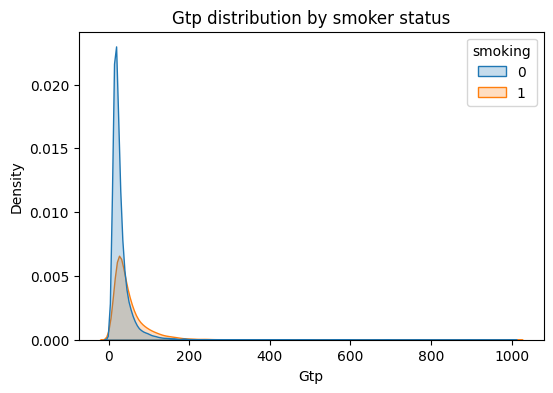

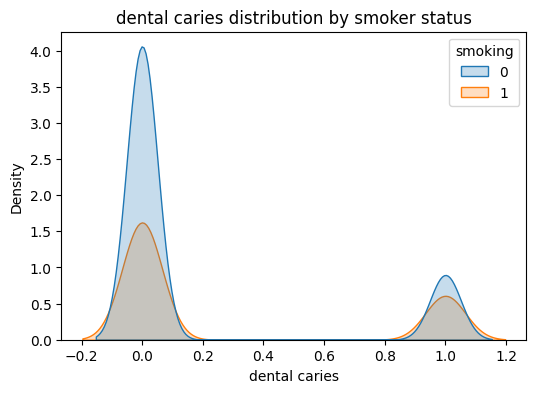

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    if col != 'smoking':  # change to your target name
        plt.figure(figsize=(6,4))
        sns.kdeplot(data=df, x=col, hue='smoking', fill=True)
        plt.title(f'{col} distribution by smoker status')
        plt.show()


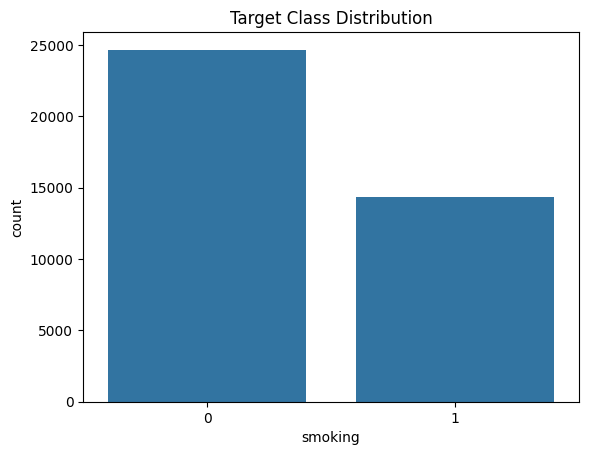

In [13]:
sns.countplot(x=df['smoking'])
plt.title("Target Class Distribution")
plt.show()


In [14]:
X = df.drop('smoking', axis=1)
y = df['smoking']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
X_train_scaled.shape, X_test_scaled.shape


((31187, 22), (7797, 22))

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

log_reg = LogisticRegression(class_weight='balanced', max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

# Metrics
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_prec = precision_score(y_test, y_pred_lr)
lr_rec = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)

lr_acc, lr_prec, lr_rec, lr_f1, lr_cm


(0.7127100166730794,
 0.581081081081081,
 0.7807262569832403,
 0.66626936829559,
 array([[3321, 1612],
        [ 628, 2236]]))

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # supports both l1 and l2
    'class_weight': ['balanced']
}

log_reg = LogisticRegression(max_iter=1000)

grid_lr = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)

best_lr = grid_lr.best_estimator_
best_lr


LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

In [20]:
y_pred_lr_tuned = best_lr.predict(X_test_scaled)

lr_tuned_acc = accuracy_score(y_test, y_pred_lr_tuned)
lr_tuned_prec = precision_score(y_test, y_pred_lr_tuned)
lr_tuned_rec = recall_score(y_test, y_pred_lr_tuned)
lr_tuned_f1 = f1_score(y_test, y_pred_lr_tuned)
lr_tuned_cm = confusion_matrix(y_test, y_pred_lr_tuned)

lr_tuned_acc, lr_tuned_prec, lr_tuned_rec, lr_tuned_f1, lr_tuned_cm


(0.7092471463383353,
 0.5763622409823485,
 0.7866620111731844,
 0.6652886460947881,
 array([[3277, 1656],
        [ 611, 2253]]))

In [21]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', class_weight='balanced')
svm_linear.fit(X_train_scaled, y_train)

y_pred_svm_linear = svm_linear.predict(X_test_scaled)

svm_lin_acc = accuracy_score(y_test, y_pred_svm_linear)
svm_lin_prec = precision_score(y_test, y_pred_svm_linear)
svm_lin_rec = recall_score(y_test, y_pred_svm_linear)
svm_lin_f1 = f1_score(y_test, y_pred_svm_linear)
svm_lin_cm = confusion_matrix(y_test, y_pred_svm_linear)

svm_lin_acc, svm_lin_prec, svm_lin_rec, svm_lin_f1, svm_lin_cm


(0.7036039502372707,
 0.5631134444190824,
 0.8613826815642458,
 0.6810213940648723,
 array([[3019, 1914],
        [ 397, 2467]]))

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_linear = {
    'C': [0.01, 0.1,1,10],
    'class_weight': ['balanced']
}

svm_linear = SVC(kernel='linear')

grid_svm_linear = GridSearchCV(
    svm_linear, param_grid_linear, cv=2, scoring='f1', n_jobs=-1
)

grid_svm_linear.fit(X_train_scaled, y_train)

best_svm_linear = grid_svm_linear.best_estimator_
best_svm_linear


SVC(C=0.1, class_weight='balanced', kernel='linear')

In [23]:
y_pred_svm_linear_tuned = best_svm_linear.predict(X_test_scaled)

svm_lin_tuned_acc = accuracy_score(y_test, y_pred_svm_linear_tuned)
svm_lin_tuned_prec = precision_score(y_test, y_pred_svm_linear_tuned)
svm_lin_tuned_rec = recall_score(y_test, y_pred_svm_linear_tuned)
svm_lin_tuned_f1 = f1_score(y_test, y_pred_svm_linear_tuned)
svm_lin_tuned_cm = confusion_matrix(y_test, y_pred_svm_linear_tuned)

svm_lin_tuned_acc, svm_lin_tuned_prec, svm_lin_tuned_rec, svm_lin_tuned_f1, svm_lin_tuned_cm


(0.7032191868667437,
 0.5626994984040128,
 0.861731843575419,
 0.6808275862068965,
 array([[3015, 1918],
        [ 396, 2468]]))

In [24]:
svm_rbf = SVC(kernel='rbf', class_weight='balanced')
svm_rbf.fit(X_train_scaled, y_train)

y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)

svm_rbf_acc = accuracy_score(y_test, y_pred_svm_rbf)
svm_rbf_prec = precision_score(y_test, y_pred_svm_rbf)
svm_rbf_rec = recall_score(y_test, y_pred_svm_rbf)
svm_rbf_f1 = f1_score(y_test, y_pred_svm_rbf)
svm_rbf_cm = confusion_matrix(y_test, y_pred_svm_rbf)

svm_rbf_acc, svm_rbf_prec, svm_rbf_rec, svm_rbf_f1, svm_rbf_cm


(0.7143773246120303,
 0.5721404303510759,
 0.8819832402234636,
 0.69405138068416,
 array([[3044, 1889],
        [ 338, 2526]]))

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_rbf = {
    'C': [1, 5, 10],
    'gamma': [0.001, 0.01, 0.1],
    'class_weight': ['balanced']
}

svm_rbf = SVC(kernel='rbf')

grid_svm_rbf = GridSearchCV(
    svm_rbf,
    param_grid_rbf,
    cv=2,          # faster
    scoring='f1',
    n_jobs=-1
)

grid_svm_rbf.fit(X_train_scaled, y_train)

best_svm_rbf = grid_svm_rbf.best_estimator_
best_svm_rbf


SVC(C=1, class_weight='balanced', gamma=0.1)

In [26]:
y_pred_svm_rbf_tuned = best_svm_rbf.predict(X_test_scaled)

svm_rbf_tuned_acc = accuracy_score(y_test, y_pred_svm_rbf_tuned)
svm_rbf_tuned_prec = precision_score(y_test, y_pred_svm_rbf_tuned)
svm_rbf_tuned_rec = recall_score(y_test, y_pred_svm_rbf_tuned)
svm_rbf_tuned_f1 = f1_score(y_test, y_pred_svm_rbf_tuned)
svm_rbf_tuned_cm = confusion_matrix(y_test, y_pred_svm_rbf_tuned)

svm_rbf_tuned_acc, svm_rbf_tuned_prec, svm_rbf_tuned_rec, svm_rbf_tuned_f1, svm_rbf_tuned_cm


(0.7250224445299475,
 0.5862068965517241,
 0.8547486033519553,
 0.6954545454545454,
 array([[3205, 1728],
        [ 416, 2448]]))

In [27]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    activation='relu',
                    max_iter=300,
                    random_state=42)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

mlp_acc = accuracy_score(y_test, y_pred_mlp)
mlp_prec = precision_score(y_test, y_pred_mlp)
mlp_rec = recall_score(y_test, y_pred_mlp)
mlp_f1 = f1_score(y_test, y_pred_mlp)
mlp_cm = confusion_matrix(y_test, y_pred_mlp)

mlp_acc, mlp_prec, mlp_rec, mlp_f1, mlp_cm


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.738873925868924,
 0.6371769383697813,
 0.6714385474860335,
 0.6538592315538932,
 array([[3838, 1095],
        [ 941, 1923]]))

In [29]:
param_grid_mlp = {
    'hidden_layer_sizes': [(64,32), (128,64), (64,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
}


In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(max_iter=500, random_state=42)

grid_mlp = GridSearchCV(
    mlp,
    param_grid_mlp,
    cv=2,
    scoring='f1',
    n_jobs=-1
)

grid_mlp.fit(X_train_scaled, y_train)

best_mlp = grid_mlp.best_estimator_
best_mlp


MLPClassifier(alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.01,
              max_iter=500, random_state=42)

In [33]:
y_pred_mlp_tuned = best_mlp.predict(X_test_scaled)

mlp_tuned_acc = accuracy_score(y_test, y_pred_mlp_tuned)
mlp_tuned_prec = precision_score(y_test, y_pred_mlp_tuned)
mlp_tuned_rec = recall_score(y_test, y_pred_mlp_tuned)
mlp_tuned_f1 = f1_score(y_test, y_pred_mlp_tuned)
mlp_tuned_cm = confusion_matrix(y_test, y_pred_mlp_tuned)

mlp_tuned_acc, mlp_tuned_prec, mlp_tuned_rec, mlp_tuned_f1, mlp_tuned_cm


(0.7455431576247274,
 0.640485312899106,
 0.7004189944134078,
 0.6691127418278853,
 array([[3807, 1126],
        [ 858, 2006]]))